In [17]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv(r"D:\StudySpace\Nam4_KyI\cap1_ai_feature\data\nutrition_dataset.csv")

# Define activity levels and their corresponding multipliers
activity_levels = {
    "Sedentary": 1.2,
    "Lightly Active": 1.375,
    "Moderately Active": 1.55,
    "Active": 1.725,
    "Very Active": 1.9,
}

# Define goal-specific calorie adjustments (can be refined based on expert knowledge)
goal_adjustments = {
    "Loss Weight": 0.8,  # Calorie deficit for weight loss
    "Stay Fit": 1,      # Maintain current weight
    "Muscle Gain": 1.2,   # Calorie surplus for muscle gain
}

# Define goal-specific macronutrient ratios (can be adjusted based on needs/preferences)
macro_ratios = {
    "Loss Weight": {"protein": 0.3, "carb": 0.4, "fat": 0.3},
    "Stay Fit": {"protein": 0.25, "carb": 0.5, "fat": 0.25},
    "Muscle Gain": {"protein": 0.35, "carb": 0.45, "fat": 0.2},
}


def calculate_bmr(weight, height, age, gender):
    # Use Mifflin-St Jeor equation (you can adapt this based on your needs)
    if gender == "Male":
        bmr = (10 * weight) + (6.25 * height*100) - (5 * age) + 5
    else:  # Female
        bmr = (10 * weight) + (6.25 * height*100) - (5 * age) - 161
    return bmr


def fill_missing_data(row):
    # Assign activity level based on BMI and randomness (more realistic)
    if row["BMI"] < 18.5:
        activity_probs = [0.1, 0.6, 0.2, 0.1, 0.0] # Higher probability for "Lightly Active"
    elif 18.5 <= row["BMI"] < 25:
        activity_probs = [0.2, 0.4, 0.3, 0.1, 0.0] # Balanced probabilities
    elif 25 <= row["BMI"] < 30:
        activity_probs = [0.3, 0.3, 0.2, 0.15, 0.05] # Slightly higher probabilities for lower activity levels
    else:  # Obese
        activity_probs = [0.4, 0.25, 0.2, 0.1, 0.05] # Higher probability for "Sedentary", but still allow for other levels


    activity_levels_list = list(activity_levels.keys())
    row["ActivityLevel"] = np.random.choice(activity_levels_list, p=activity_probs)


    # Assign goal based on BMI (more realistic)
    if row["BMI"] < 18.5:
        goal_probs = [0.05, 0.45, 0.5] # Prioritize muscle gain/stay fit, less on weight loss
    elif 18.5 <= row["BMI"] < 25:
        goal_probs = [0.2, 0.6, 0.2] # Balanced distribution of goals
    elif 25 <= row["BMI"] < 30:
        goal_probs = [0.5, 0.3, 0.2]  # Higher probability of weight loss goal
    else:  # Obese
        goal_probs = [0.7, 0.2, 0.1]  # Highest probability of weight loss goal

    goals_list = list(goal_adjustments.keys())
    row["Goal"] = np.random.choice(goals_list, p=goal_probs)
    

    bmr = calculate_bmr(row["Weight"], row["Height"], row["Age"], row["Gender"])
    row["BMR"] = bmr    
    
    activity_multiplier = activity_levels[row["ActivityLevel"]]
    calorie_adjustment = goal_adjustments[row["Goal"]]
    row["Calories"] = round( (bmr * activity_multiplier) * calorie_adjustment)

    # Calculate macronutrients based on calorie target and chosen macro ratios
    ratios = macro_ratios[row["Goal"]]
    row["Protein"] = round(row["Calories"] * ratios["protein"] / 4)  # Protein provides 4 calories/gram
    row["Carb"] = round(row["Calories"] * ratios["carb"] / 4)     # Carbs provide 4 calories/gram
    row["Fat"] = round(row["Calories"] * ratios["fat"] / 9)       # Fat provides 9 calories/gram
    return row

# Apply the function to fill the missing columns
df = df.apply(fill_missing_data, axis=1)

# Save the updated DataFrame
df.to_csv(r"D:\StudySpace\Nam4_KyI\cap1_ai_feature\data\updated_nutrition_dataset.csv", index=False)  # Save to a new CSV file
print("saved updated_nutrition_dataset.csv")

saved updated_nutrition_dataset.csv


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Data Exploration
print(df.head())  # Display the first few rows
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics of numerical columns

       Weight    Height        BMI  Age  Gender     BMIcase  \
0   92.085190  1.760250  29.719488   59  Female       Obese   
1   61.089124  1.595499  23.997776   25  Female  Overweight   
2   82.454037  1.816538  24.987499   50  Female  Overweight   
3  101.713306  1.790696  31.720047   62  Female       Obese   
4   99.609527  1.969726  25.673756   57    Male  Overweight   

       ActivityLevel         Goal  Calories  Protein  Carb  Fat          BMR  
0  Moderately Active  Loss Weight      1941      146   194   65  1565.007848  
1  Moderately Active  Loss Weight      1639      123   164   55  1322.077937  
2     Lightly Active     Stay Fit      2130      133   266   59  1548.876812  
3             Active  Loss Weight      2298      172   230   77  1665.318345  
4          Sedentary     Stay Fit      2337      146   292   65  1947.173792  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dt

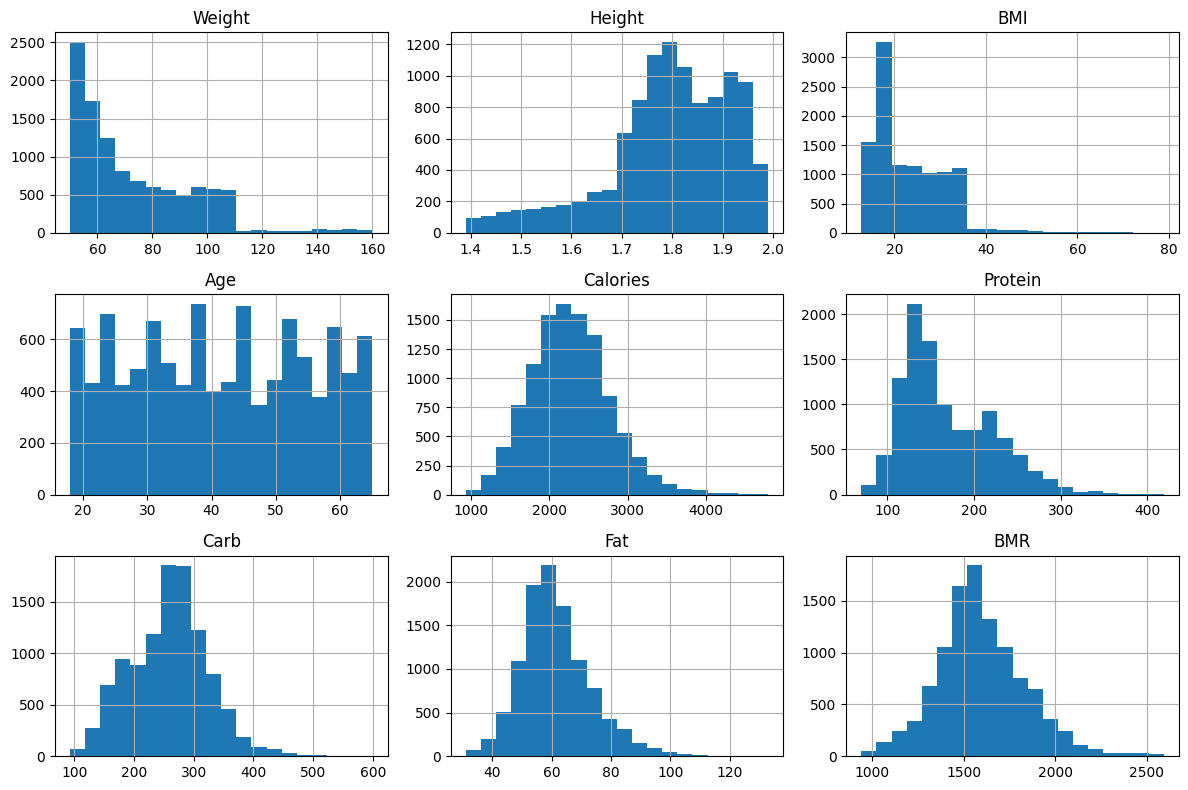

In [19]:
# 2. Distribution of Numerical Features
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

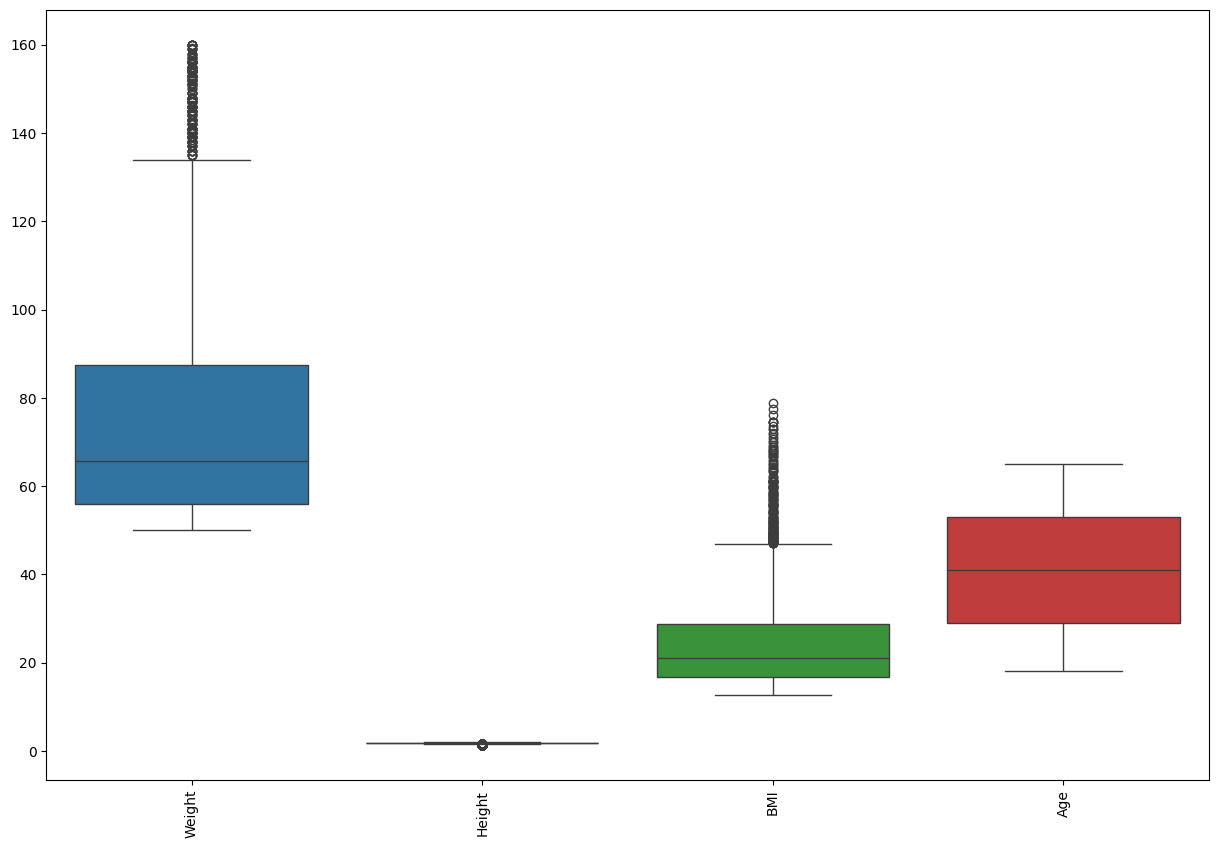

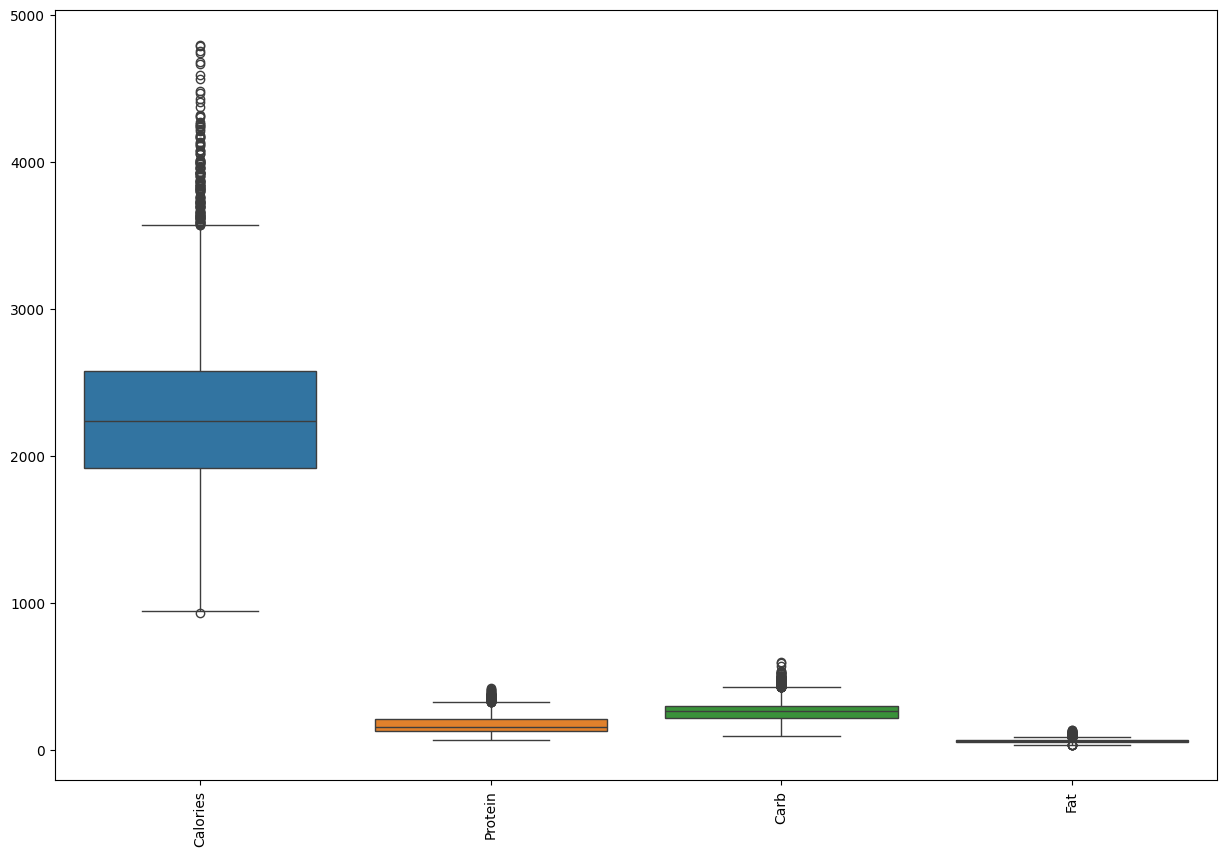

In [20]:
# 3. Box Plots for Outlier Detection
user_cols = ["Weight", "Height", "BMI", "Age"]
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[user_cols])
plt.xticks(rotation=90)
plt.show()

nutrition_cols = ["Calories", "Protein", "Carb", "Fat"]
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[nutrition_cols])
plt.xticks(rotation=90)
plt.show()


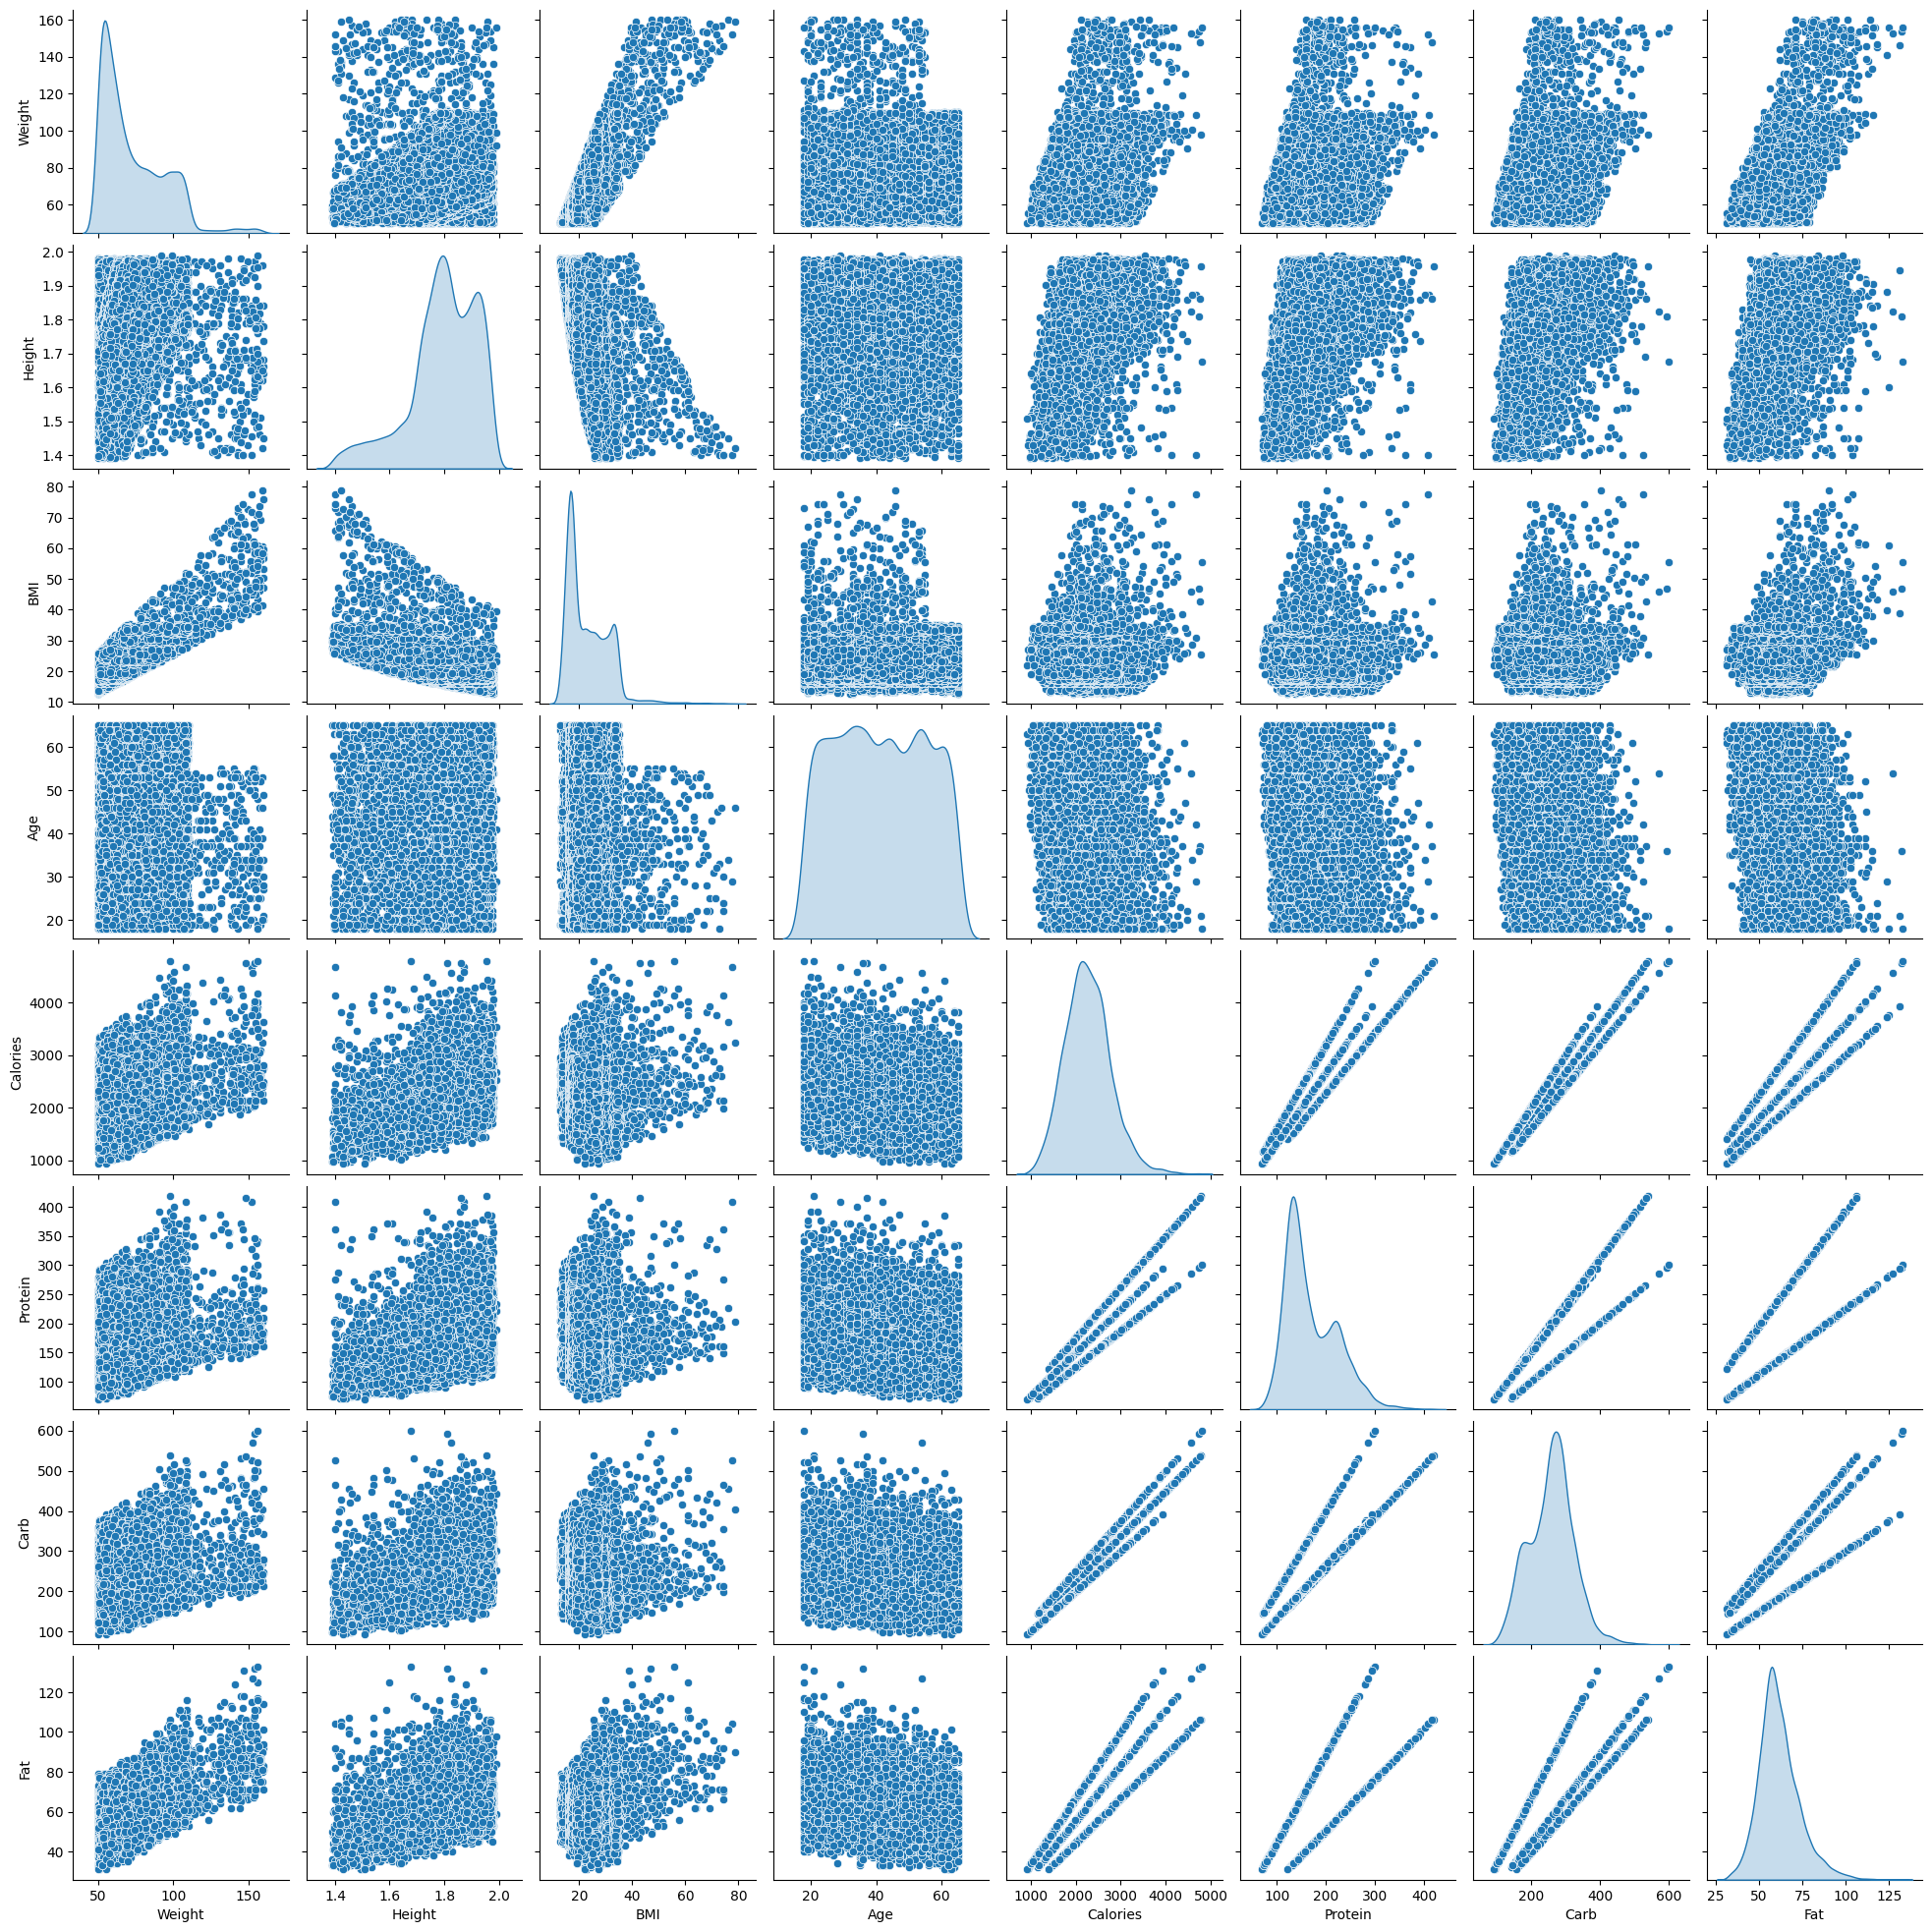

In [21]:
# 4. Relationships between Variables
sns.pairplot(df[user_cols+nutrition_cols], diag_kind='kde')
plt.show()


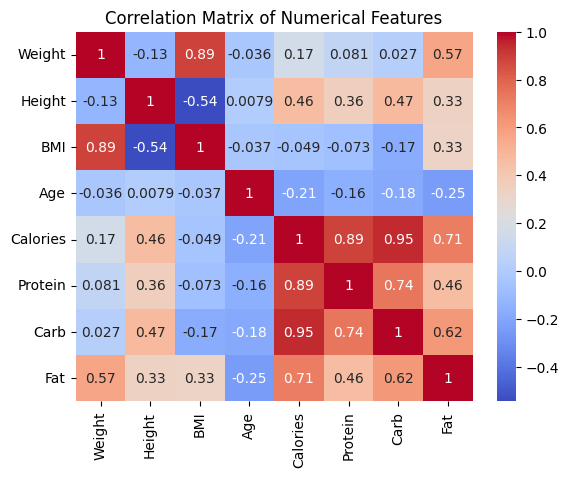

In [22]:
# 5. Correlation Matrix
numerical_cols = user_cols + nutrition_cols
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

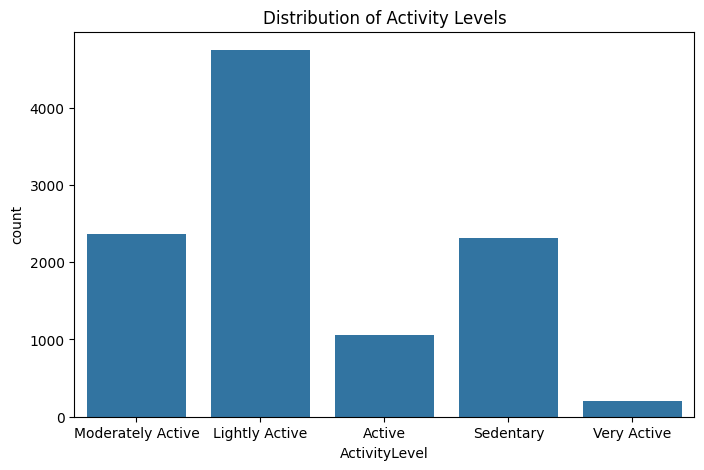

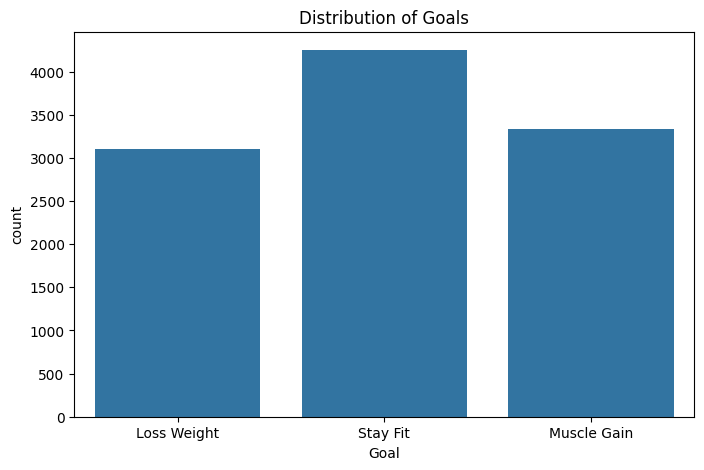

In [23]:
# 6. Activity Level and Goal Distributions
plt.figure(figsize=(8, 5))
sns.countplot(x="ActivityLevel", data=df)
plt.title("Distribution of Activity Levels")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x="Goal", data=df)
plt.title("Distribution of Goals")
plt.show()

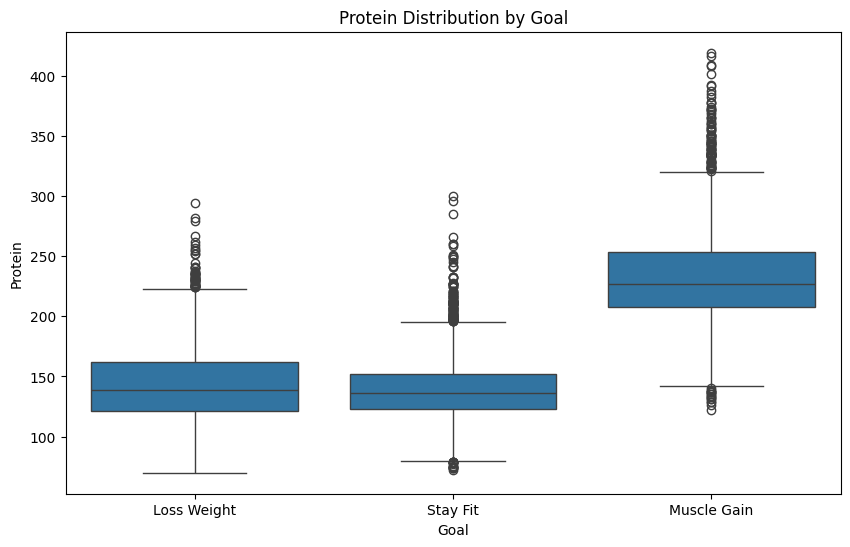

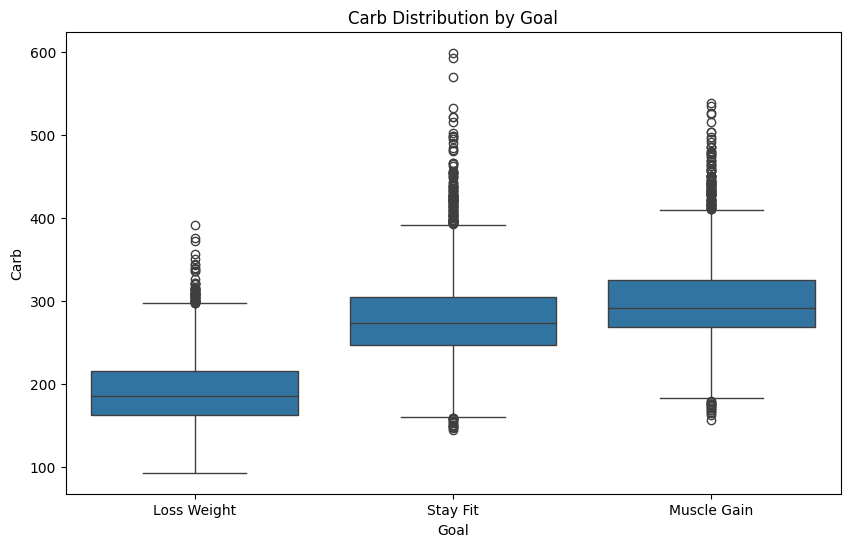

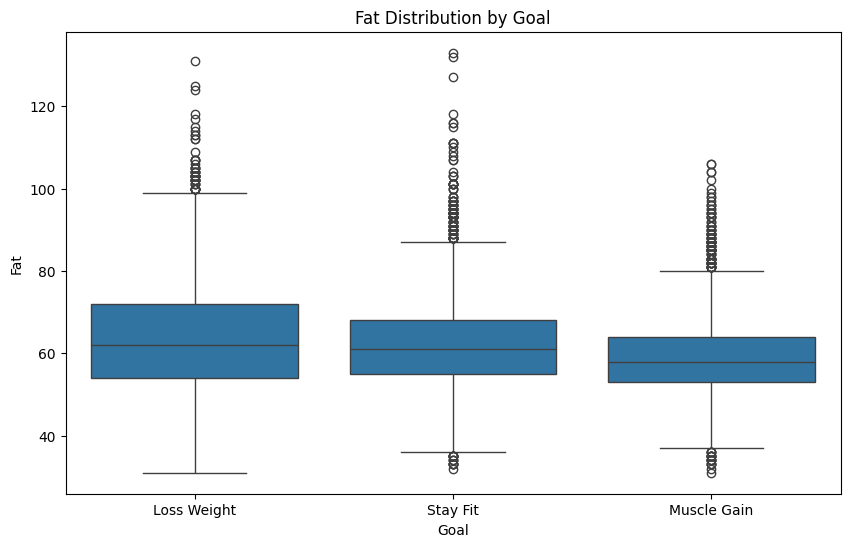

In [24]:
# 7. Macronutrient Distribution by Goal
plt.figure(figsize=(10, 6))
sns.boxplot(x="Goal", y="Protein", data=df)
plt.title("Protein Distribution by Goal")
plt.show()

# Repeat the above for "Carb" and "Fat"
plt.figure(figsize=(10, 6))
sns.boxplot(x="Goal", y="Carb", data=df)
plt.title("Carb Distribution by Goal")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Goal", y="Fat", data=df)
plt.title("Fat Distribution by Goal")
plt.show()


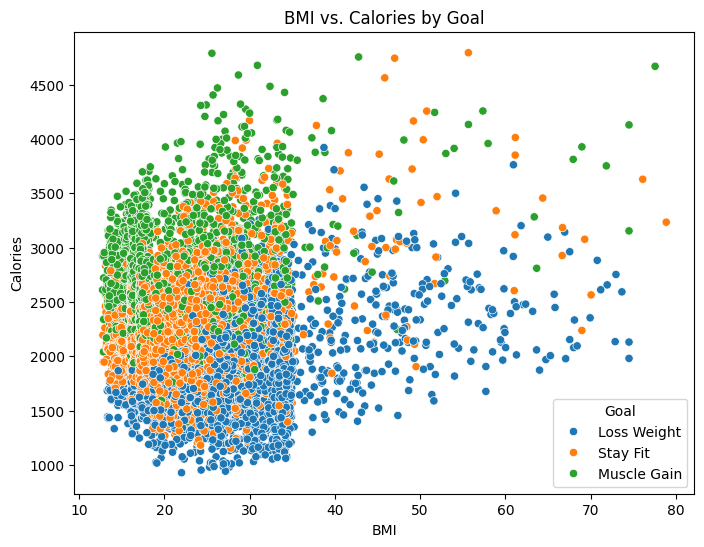

In [25]:
# 8. BMI vs. other features (scatter plots with hue for Goal)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="BMI", y="Calories", hue="Goal", data=df)
plt.title("BMI vs. Calories by Goal")
plt.show()